In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report


import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(0)

In [2]:
file_path="./Churn_Modelling.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Attributes

- **RowNumber**: Số thứ tự của bản ghi.
- **CustomerId**: Mã số khách hàng.
- **Surname**: Họ của khách hàng.
- **CreditScore**: Điểm tín dụng của khách hàng.
- **Geography**: Quốc gia của khách hàng.
- **Gender**: Giới tính của khách hàng.
- **Age**: Tuổi của khách hàng.
- **Tenure**: Thời gian khách hàng gắn bó với ngân hàng.
- **Balance**: Số dư tài khoản của khách hàng.
- **NumOfProducts**: Số lượng sản phẩm ngân hàng mà khách hàng đang sử dụng.
- **HasCrCard**: Khách hàng có sở hữu thẻ tín dụng hay không.
- **IsActiveMember**: Khách hàng có phải là thành viên hoạt động hay không.
- **EstimatedSalary**: Mức lương ước tính của khách hàng.
- **Exited**: Biến mục tiêu, cho biết khách hàng có rời ngân hàng hay không (1 là có, 0 là không).


# I. Data Exploration


## 1. Check for missing values

In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 2. Get summary statistics for numerical features


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


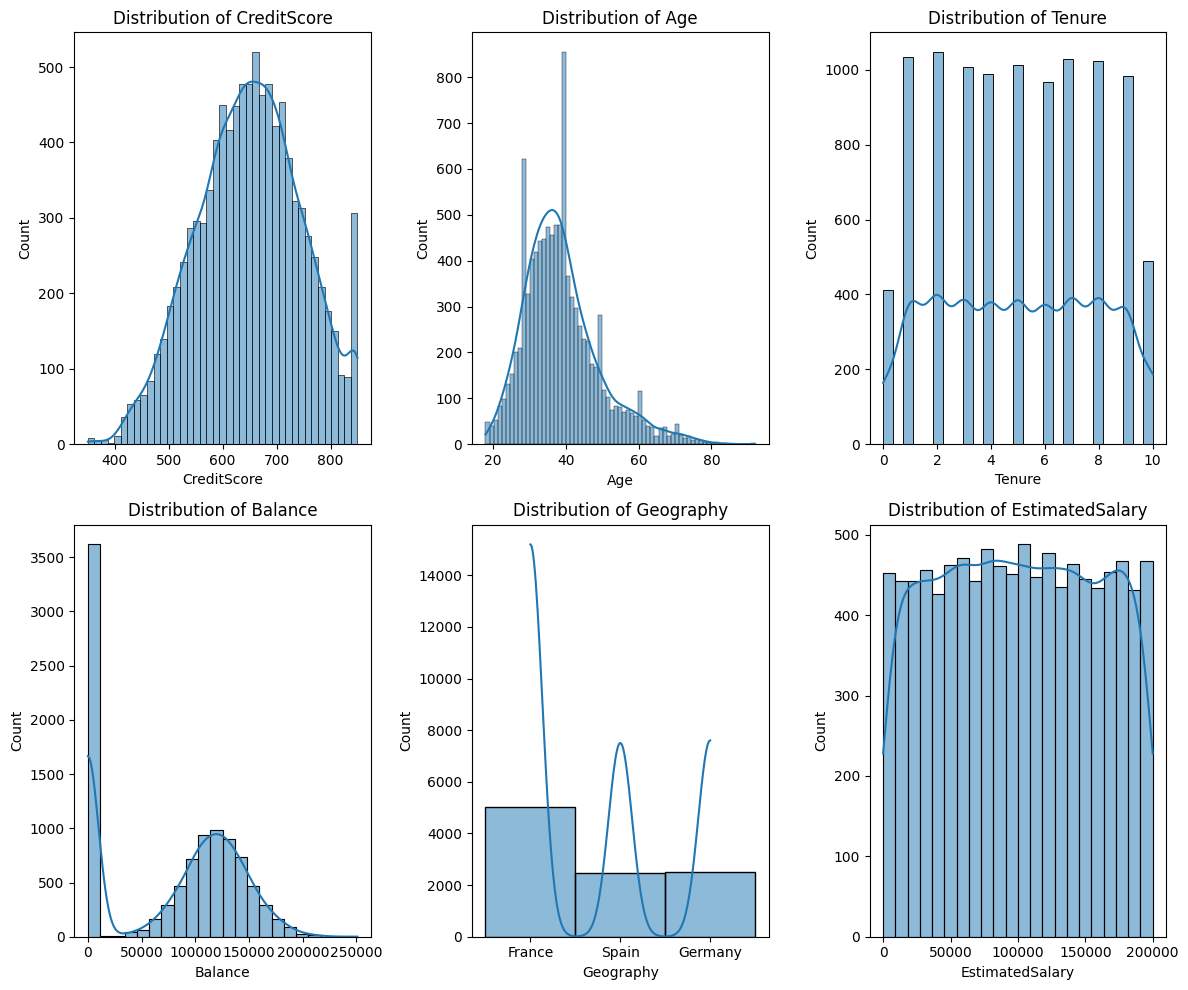

In [5]:
# Visualize the distribution of key numerical features
plt.figure(figsize=(12, 10))

# Select key numerical columns to visualize
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Geography', 'EstimatedSalary']

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## 3. Distribution of customers by age & Exited status count by age group

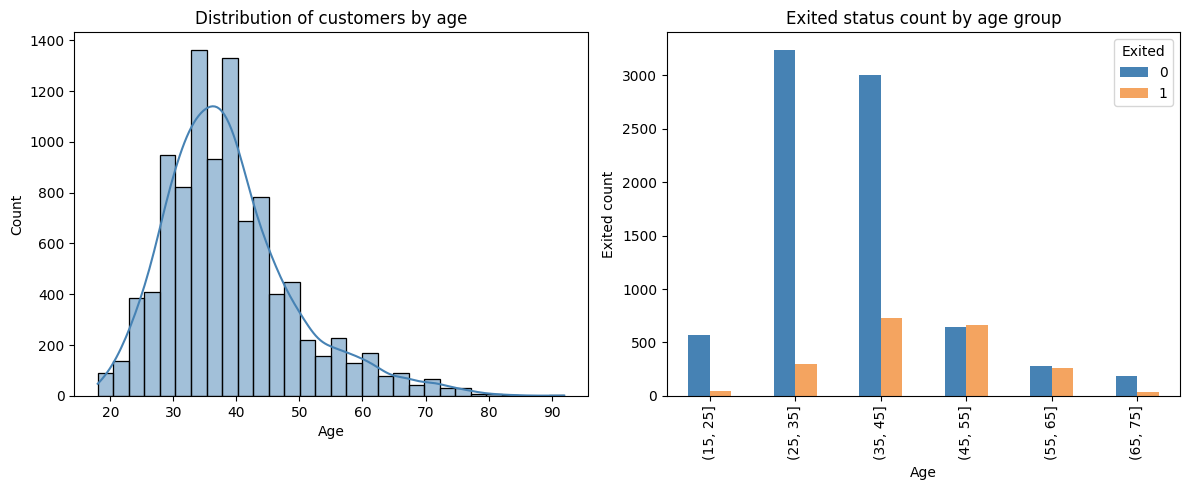

In [6]:
# Part (a): Age Distribution Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of customers by age")
plt.xlabel("Age")
plt.ylabel("Count")

# Part (b): Age Group by Exited Status
age_bins = pd.cut(data['Age'], bins=[15, 25, 35, 45, 55, 65, 75])
age_exit = data.groupby([age_bins, 'Exited']).size().unstack().fillna(0)

# Plotting age group vs. exited status
plt.subplot(1, 2, 2)
age_exit.plot(kind='bar', stacked=False, color=["steelblue", "sandybrown"], ax=plt.gca())
plt.title("Exited status count by age group")
plt.xlabel("Age")
plt.ylabel("Exited count")
plt.legend(title="Exited", labels=["0", "1"])

plt.tight_layout()
plt.show()

## 4. Customer Geography Disribution

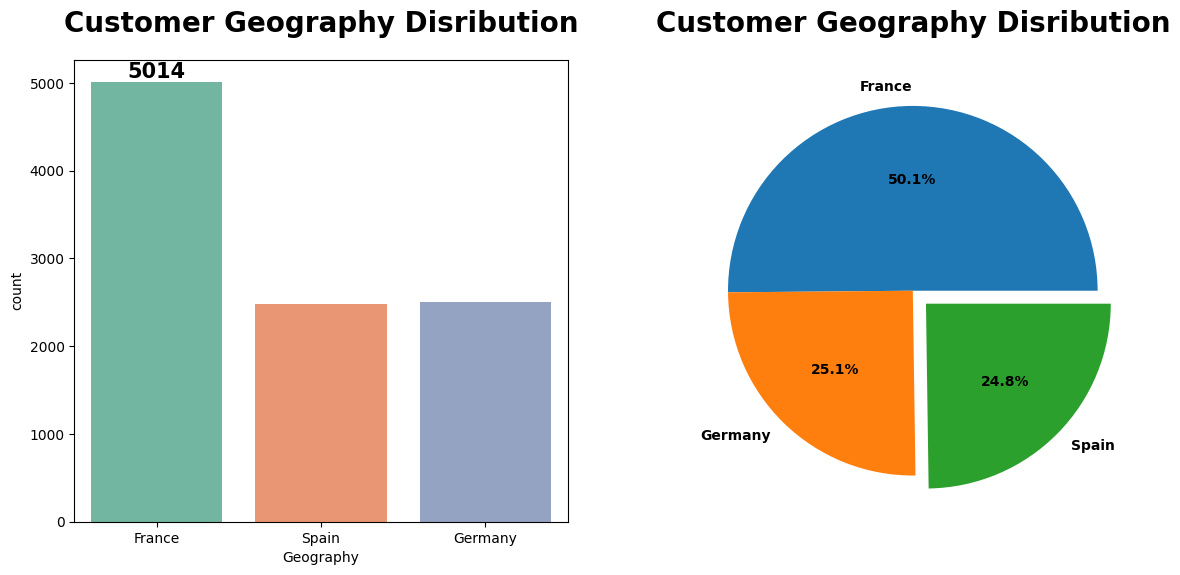

In [7]:
count = data["Geography"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=data, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

## 5. Scatter matrix & Correlation Matrix

<Figure size 1200x1000 with 0 Axes>

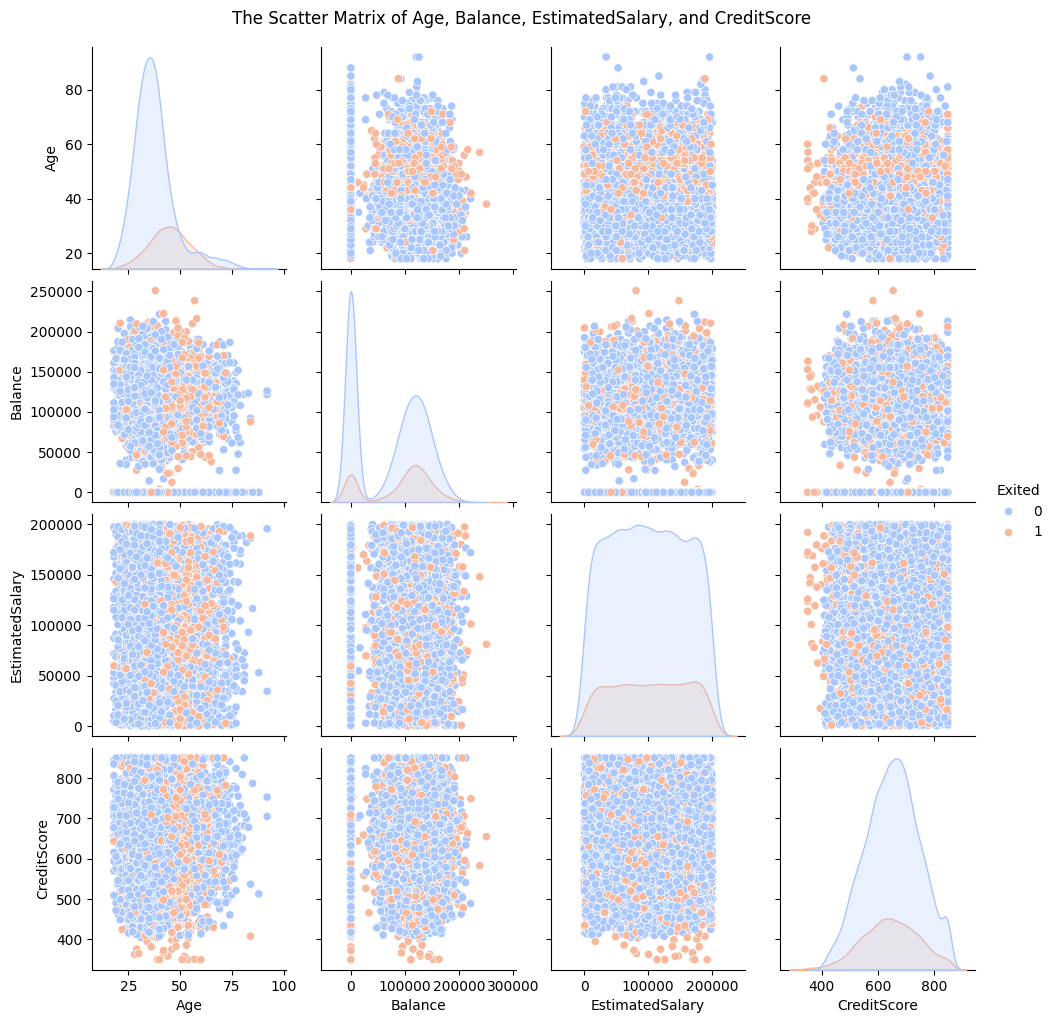

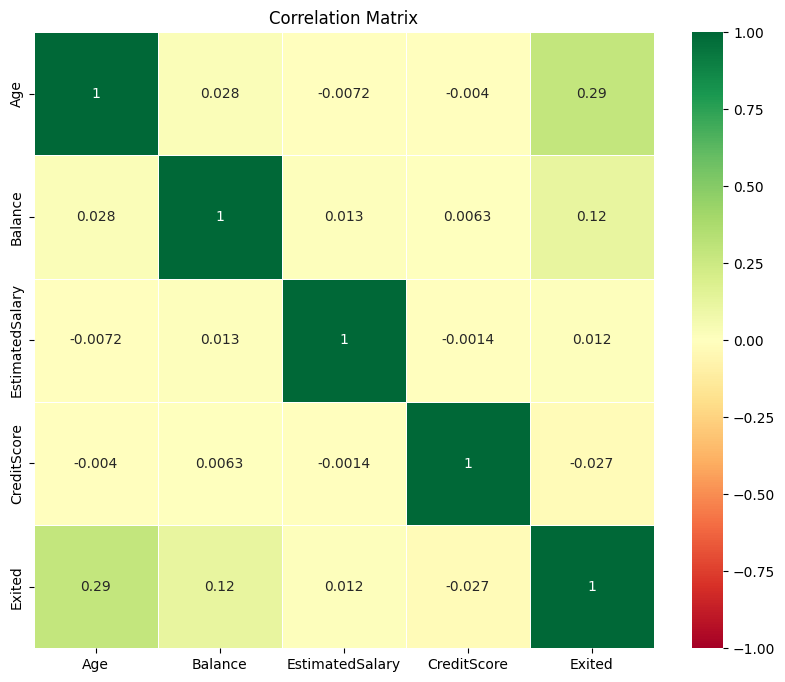

In [8]:

# Biểu đồ ma trận phân tán (Scatter Matrix)
plt.figure(figsize=(12, 10))
sns.pairplot(data[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']], hue='Exited', palette='coolwarm')
plt.suptitle('The Scatter Matrix of Age, Balance, EstimatedSalary, and CreditScore', y=1.02)
plt.show()

# Ma trận tương quan (Correlation Matrix)
plt.figure(figsize=(10, 8))
corr_matrix = data[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 6. Visualizing the churn rate

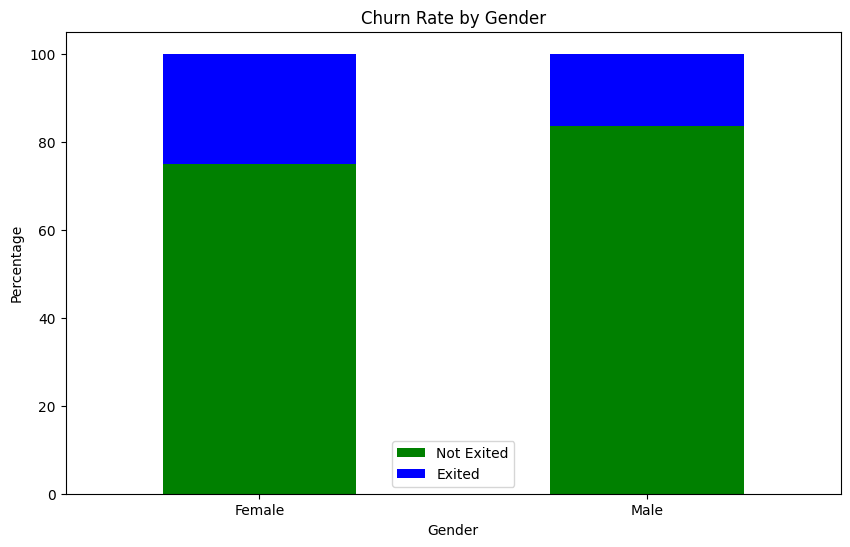

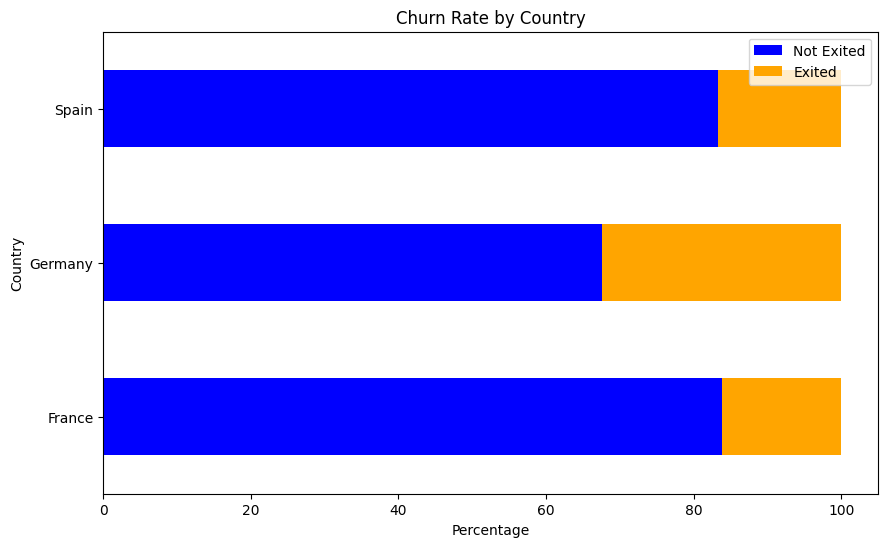

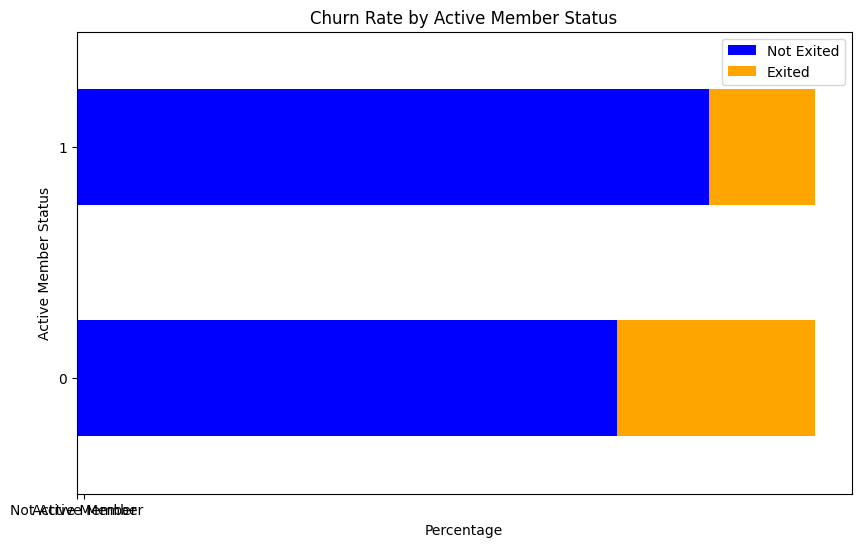

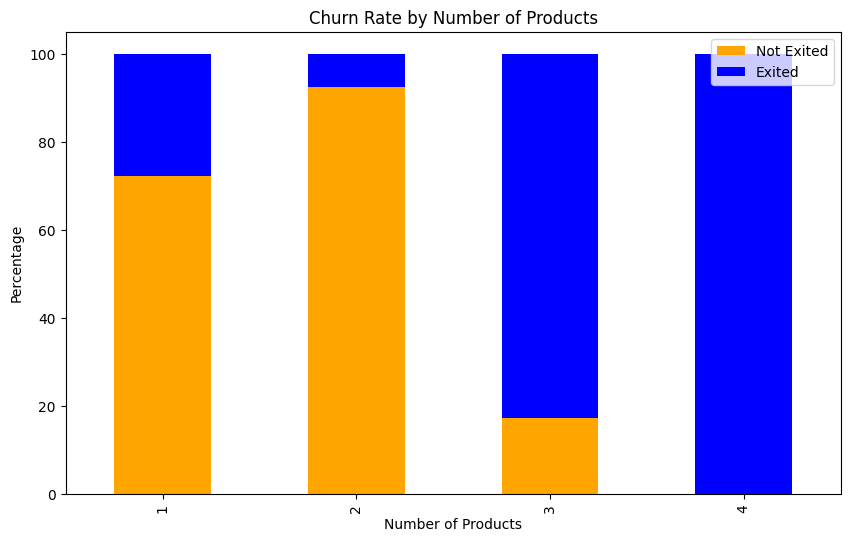

In [9]:
# (a) Churn Rate by Gender
plt.figure(figsize=(10, 6))
gender_churn = data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack() * 100
gender_churn.plot(kind='bar', stacked=True, color=['green', 'blue'], ax=plt.gca())
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (b) Churn Rate by Country
plt.figure(figsize=(10, 6))
country_churn = data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack() * 100
country_churn.plot(kind='barh', stacked=True, color=['blue', 'orange'], ax=plt.gca())
plt.title('Churn Rate by Country')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (c) Churn Rate by Active Member Status
plt.figure(figsize=(10, 6))
active_churn = data.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).unstack() * 100
active_churn.plot(kind='barh', stacked=True, color=['blue', 'orange'], ax=plt.gca())
plt.title('Churn Rate by Active Member Status')
plt.xlabel('Percentage')
plt.ylabel('Active Member Status')
plt.xticks([0, 1], ['Not Active Member', 'Active Member'])
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (d) Churn Rate by Number of Products
plt.figure(figsize=(10, 6))
products_churn = data.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).unstack() * 100
products_churn.plot(kind='bar', stacked=True, color=['orange', 'blue'], ax=plt.gca())
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Percentage')
plt.legend(['Not Exited', 'Exited'])
plt.show()

# II. Data preparation

## 1. Encoder data

In [10]:
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])


# Khởi tạo OneHotEncoder với tham số drop='first' để loại bỏ một cột
encoder = OneHotEncoder(sparse_output=False)

# Mã hóa cột 'Geography'
geography_encoded = encoder.fit_transform(data[['Geography']])


# Tạo DataFrame từ kết quả mã hóa
geography_df = pd.DataFrame(geography_encoded, columns=encoder.get_feature_names_out(['Geography']))

# Ghép các cột đã mã hóa vào DataFrame gốc và loại bỏ cột gốc 'Geography'
data = pd.concat([data.drop('Geography', axis=1), geography_df], axis=1)


## 2. Drop Unneeded Columns


In [11]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [12]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


## 3. Define Features X and Target y

In [13]:
x_var = data.columns[data.columns != 'Exited']

y_var = ["Exited"]

In [14]:
X = data[x_var]
y = data[y_var]

In [15]:
X.shape

(10000, 12)

In [16]:
y.shape

(10000, 1)

## 4. Data Scaling



In [17]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Apply scaling to numerical columns
# numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
# X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# III. Experiment

In [18]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [19]:
# Khởi tạo các mô hình
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "DT": DecisionTreeClassifier(),
    "LR": LogisticRegression(max_iter=1000),
    "ANN": MLPClassifier(max_iter=1000),
    "NB": GaussianNB(),
    "RF": RandomForestClassifier(random_state=42),
    "B": BaggingClassifier(random_state=42),
    "GB": GradientBoostingClassifier(random_state=42),
    "ET": ExtraTreesClassifier(random_state=42),
    "AB": AdaBoostClassifier(random_state=42)
}

## 1. Before SMOTE

In [45]:
# Hàm đánh giá mô hình với k-fold cross-validation và chỉ số AUC
def evaluate_model(X, y, model, n_splits=5, random_state=42):
    # Thiết lập k-fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Danh sách lưu trữ kết quả
    accuracies = []
    f1_scores = []
    auc_scores = []
    
    # Bắt đầu quá trình k-fold cross-validation
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
        # Huấn luyện mô hình
        model.fit(X_train_fold, y_train_fold)
        
        # Dự đoán trên tập kiểm tra của fold
        y_pred = model.predict(X_val_fold)
        y_pred_proba = model.predict_proba(X_val_fold)[:, 0] 
        
        # Đánh giá mô hình
        acc = accuracy_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred)
        auc = roc_auc_score(y_val_fold, y_pred_proba)
        
        accuracies.append(acc)
        f1_scores.append(f1)
        auc_scores.append(auc)
    
    # Trả về danh sách kết quả của accuracy, f1-score và AUC
    return accuracies, f1_scores, auc_scores

In [46]:
# Danh sách lưu kết quả của tất cả các folds cho từng mô hình
results_without_smote = []

# Chạy từng mô hình và lưu kết quả từ tất cả các folds
for model_name, model in models.items():
    accuracies, f1_scores, auc_scores = evaluate_model(X, y, model)
    for fold_index, (acc, f1, auc) in enumerate(zip(accuracies, f1_scores, auc_scores)):
        results_without_smote.append({
            "Model": model_name,
            "Fold": fold_index + 1,
            "Accuracy": acc,
            "f1-Score": f1,
            "AUC": auc
        })

# Chuyển kết quả thành DataFrame
results_without_smote_df = pd.DataFrame(results_without_smote)

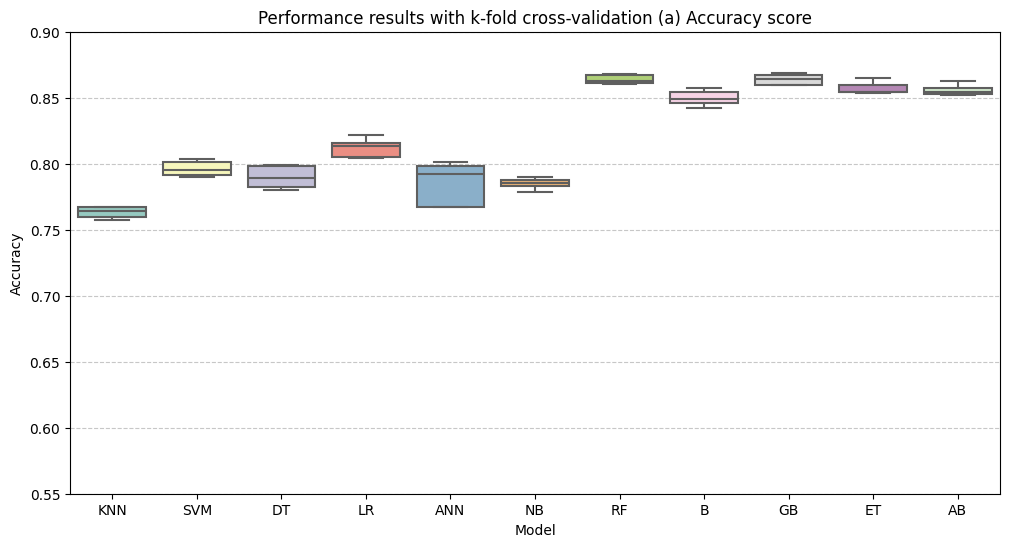

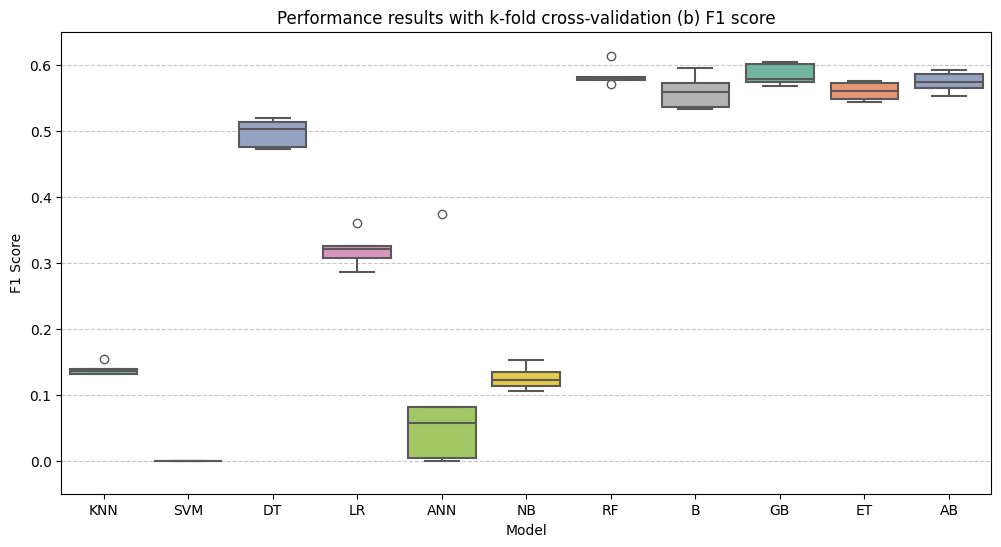

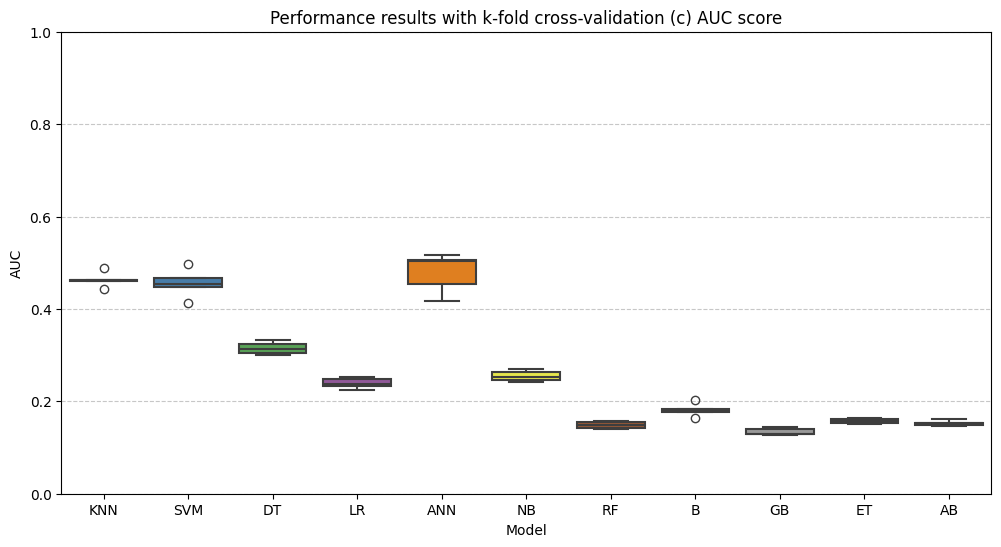

In [47]:
# Vẽ biểu đồ Accuracy
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Accuracy', data=results_without_smote_df, palette='Set3', linewidth=1.5)
plt.title('Performance results with k-fold cross-validation (a) Accuracy score')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.55, 0.9)  # Điều chỉnh giới hạn y để phù hợp
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Vẽ biểu đồ f1-Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='f1-Score', data=results_without_smote_df, palette='Set2', linewidth=1.5)
plt.title('Performance results with k-fold cross-validation (b) F1 score')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.ylim(-0.05, 0.65)  # Điều chỉnh giới hạn y để phù hợp
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Vẽ biểu đồ AUC
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='AUC', data=results_without_smote_df, palette='Set1', linewidth=1.5)
plt.title('Performance results with k-fold cross-validation (c) AUC score')
plt.ylabel('AUC')
plt.xlabel('Model')
plt.ylim(0, 1.0)  # Điều chỉnh giới hạn y để phù hợp
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [42]:
# Tính toán trung bình cho mỗi mô hình và giữ nguyên thứ tự xuất hiện ban đầu
results_without_smote_df = (
    results_without_smote_df.groupby('Model', sort=False)
    .agg({'Accuracy': 'mean', 'f1-Score': 'mean', 'AUC': 'mean'})
    .reset_index()
)

# Giữ lại các cột cần thiết và làm tròn các giá trị để dễ đọc hơn
results_without_smote_df = results_without_smote_df[['Model', 'Accuracy', 'f1-Score', 'AUC']].round(2)

# In ra kết quả trung bình
print(results_without_smote_df)


   Model  Accuracy  f1-Score   AUC
0    KNN      0.76      0.14  0.46
1    SVM      0.80      0.00  0.46
2     DT      0.79      0.50  0.32
3     LR      0.81      0.32  0.24
4    ANN      0.75      0.12  0.48
5     NB      0.78      0.13  0.26
6     RF      0.86      0.58  0.15
7      B      0.85      0.56  0.18
8     GB      0.86      0.58  0.13
9     ET      0.86      0.56  0.16
10    AB      0.86      0.57  0.15


## 2. After SMOTE


In [30]:
# Hàm đánh giá mô hình với k-fold cross-validation và SMOTE, bổ sung tính toán AUC
def evaluate_model_with_smote(X, y, model, n_splits=5, random_state=42):
    # Thiết lập k-fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Danh sách lưu trữ kết quả
    accuracies = []
    f1_scores = []
    auc_scores = []
    
    # Bắt đầu quá trình k-fold cross-validation
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
        # Áp dụng SMOTE cho tập train
        smote = SMOTE(random_state=random_state)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
        
        # Huấn luyện mô hình
        model.fit(X_train_resampled, y_train_resampled)
        
        # Dự đoán trên tập kiểm tra của fold
        y_pred = model.predict(X_val_fold)
        y_pred_proba = model.predict_proba(X_val_fold)[:, 1]  # Lấy xác suất dự đoán
        
        # Đánh giá mô hình
        acc = accuracy_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred, pos_label=0)  # Chú ý định nghĩa nhãn dương
        auc = roc_auc_score(y_val_fold, y_pred_proba)
        
        accuracies.append(acc)
        f1_scores.append(f1)
        auc_scores.append(auc)
    
    # Trả về danh sách kết quả của accuracy, f1-score và AUC
    return accuracies, f1_scores, auc_scores

In [31]:
# Danh sách lưu kết quả của tất cả các folds cho từng mô hình
results_with_smote = []

# Chạy từng mô hình và lưu kết quả từ tất cả các folds
for model_name, model in models.items():
    accuracies, f1_scores, auc_scores = evaluate_model_with_smote(X, y, model)  # Sử dụng hàm với SMOTE
    for fold_index, (acc, f1, auc) in enumerate(zip(accuracies, f1_scores, auc_scores)):
        results_with_smote.append({
            "Model": model_name,
            "Fold": fold_index + 1,
            "Accuracy": acc,
            "f1-Score": f1,
            "AUC": auc
        })

# Chuyển kết quả thành DataFrame
results_with_smote_df = pd.DataFrame(results_with_smote)

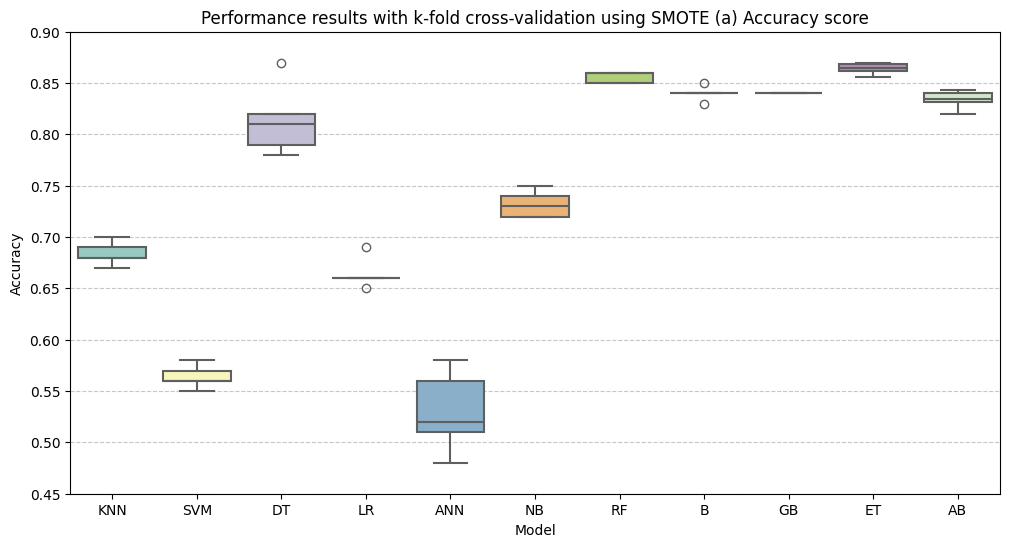

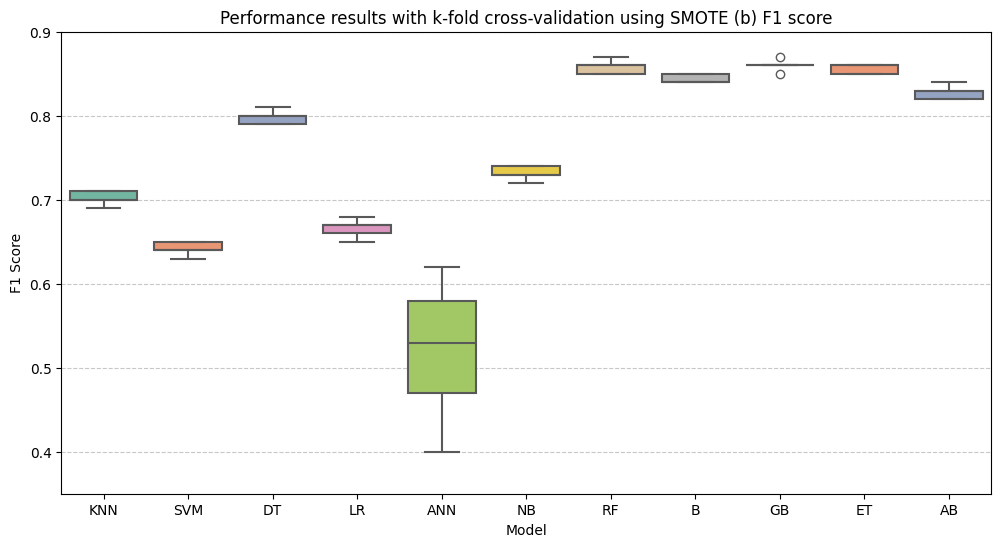

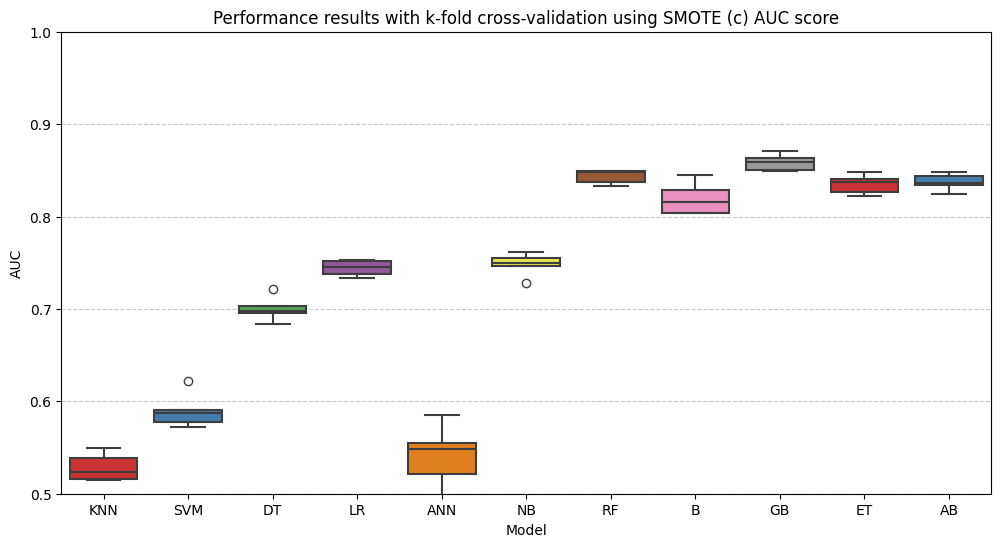

In [33]:
# Vẽ biểu đồ Accuracy
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Accuracy', data=results_with_smote_df, palette='Set3', linewidth=1.5)
plt.title('Performance results with k-fold cross-validation using SMOTE (a) Accuracy score')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.45, 0.9)  # Điều chỉnh giới hạn y để phù hợp với dữ liệu của bạn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Vẽ biểu đồ f1-Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='f1-Score', data=results_with_smote_df, palette='Set2', linewidth=1.5)
plt.title('Performance results with k-fold cross-validation using SMOTE (b) F1 score')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.ylim(0.35, 0.9)  # Điều chỉnh giới hạn y để phù hợp với dữ liệu của bạn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Vẽ biểu đồ AUC
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='AUC', data=results_with_smote_df, palette='Set1', linewidth=1.5)
plt.title('Performance results with k-fold cross-validation using SMOTE (c) AUC score')
plt.ylabel('AUC')
plt.xlabel('Model')
plt.ylim(0.5, 1.0)  # Điều chỉnh giới hạn y để phù hợp với dữ liệu của bạn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [34]:
# Tính toán trung bình cho mỗi mô hình và giữ nguyên thứ tự xuất hiện ban đầu
results_with_smote_df = (
    results_with_smote_df.groupby('Model', sort=False)
    .agg({'Accuracy': 'mean', 'f1-Score': 'mean', 'AUC': 'mean'})
    .reset_index()
)

# Giữ lại các cột cần thiết và làm tròn các giá trị để dễ đọc hơn
results_with_smote_df = results_with_smote_df[['Model', 'Accuracy', 'f1-Score', 'AUC']].round(2)

# In ra kết quả trung bình
print(results_with_smote_df)

   Model  Accuracy  f1-Score   AUC
0    KNN      0.68      0.70  0.53
1    SVM      0.56      0.64  0.59
2     DT      0.81      0.80  0.70
3     LR      0.66      0.67  0.74
4    ANN      0.53      0.52  0.54
5     NB      0.73      0.73  0.75
6     RF      0.86      0.86  0.84
7      B      0.84      0.84  0.82
8     GB      0.84      0.86  0.86
9     ET      0.86      0.86  0.84
10    AB      0.83      0.83  0.84


## 3. Result


In [43]:
# Đổi tên các cột để phân biệt với/không SMOTE
results_without_smote_df.columns = ["Model", "Accuracy (No SMOTE)", "f1-Score (No SMOTE)", "AUC (No SMOTE)"]
results_with_smote_df.columns = ["Model", "Accuracy (With SMOTE)", "f1-Score (With SMOTE)", "AUC (With SMOTE)"]

# Kết hợp hai DataFrame
combined_results_df = pd.concat([results_without_smote_df.set_index("Model"), 
                                 results_with_smote_df.set_index("Model")], axis=1).reset_index()

# Hiển thị kết quả
print(combined_results_df)

   Model  Accuracy (No SMOTE)  f1-Score (No SMOTE)  AUC (No SMOTE)  \
0    KNN                 0.76                 0.14            0.46   
1    SVM                 0.80                 0.00            0.46   
2     DT                 0.79                 0.50            0.32   
3     LR                 0.81                 0.32            0.24   
4    ANN                 0.75                 0.12            0.48   
5     NB                 0.78                 0.13            0.26   
6     RF                 0.86                 0.58            0.15   
7      B                 0.85                 0.56            0.18   
8     GB                 0.86                 0.58            0.13   
9     ET                 0.86                 0.56            0.16   
10    AB                 0.86                 0.57            0.15   

    Accuracy (With SMOTE)  f1-Score (With SMOTE)  AUC (With SMOTE)  
0                    0.68                   0.70              0.53  
1                    

## 4. Optimizing Random Forest Performances Results

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
n_splits = 5
random_state = 42

# Thiết lập k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Danh sách lưu trữ kết quả
accuracies = []
f1_scores = []
auc_scores = []
best_params_list = []

best_overall_model = None
best_overall_score = -float('inf')

# Bắt đầu quá trình k-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Áp dụng SMOTE cho tập train
    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold.values.ravel())
    
    # Tạo mô hình Random Forest và áp dụng GridSearchCV
    model = RandomForestClassifier(random_state=random_state)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    
    # Huấn luyện mô hình với GridSearchCV
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_model = grid_search.best_estimator_
    best_params_list.append(grid_search.best_params_)
    
    # Dự đoán trên tập kiểm tra của fold
    y_pred = best_model.predict(X_val_fold)
    y_pred_proba = best_model.predict_proba(X_val_fold)[:, 0]  # Lấy xác suất của label 0
    
    # Đánh giá mô hình
    acc = accuracy_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred, pos_label=0)
    auc = roc_auc_score(y_val_fold, y_pred_proba)
    
    if f1 > best_overall_score:
        best_overall_score = f1
        best_overall_model = best_model
    
    accuracies.append(acc)
    f1_scores.append(f1)
    auc_scores.append(auc)

# In kết quả
print("Best Overall Model:", best_overall_model)
print("Accuracies:", accuracies)
print("F1 Scores:", f1_scores)
print("AUC Scores:", auc_scores)
print("Best Parameters for each fold:", best_params_list)

Best Overall Model: RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
Accuracies: [0.849, 0.8385, 0.8515, 0.84, 0.832]
F1 Scores: [0.9063856168629882, 0.8989677822959025, 0.9075054500155715, 0.899874843554443, 0.8953271028037383]
AUC Scores: [0.14707442470996007, 0.1678566180536304, 0.14703209764918626, 0.1517392609260659, 0.16016797054763]
Best Parameters for each fold: [{'max_depth': 20, 'n_estimators': 200}, {'max_depth': 20, 'n_estimators': 100}, {'max_depth': 20, 'n_estimators': 200}, {'max_depth': None, 'n_estimators': 100}, {'max_depth': None, 'n_estimators': 200}]


# IV. Model Explanation

In [37]:
import shap

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

explainer = shap.TreeExplainer(best_overall_model)
shap_values = explainer.shap_values(X_val_fold)

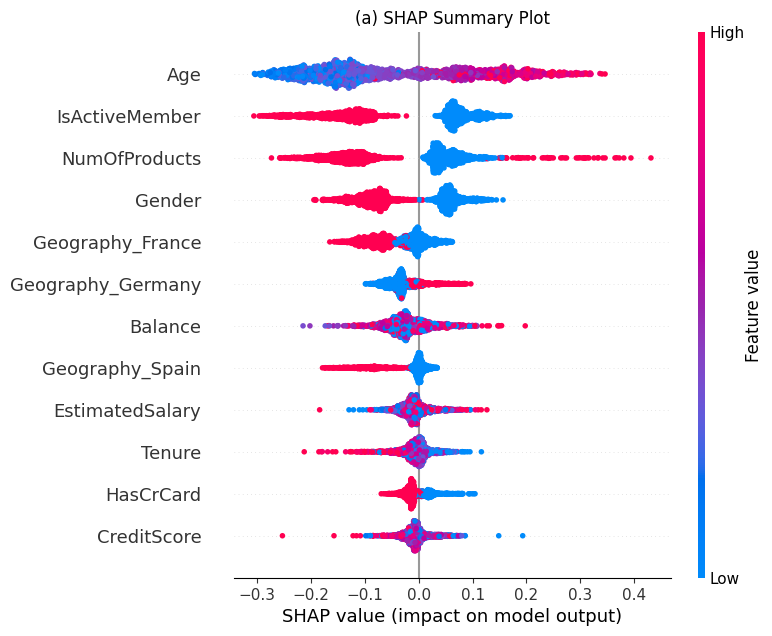

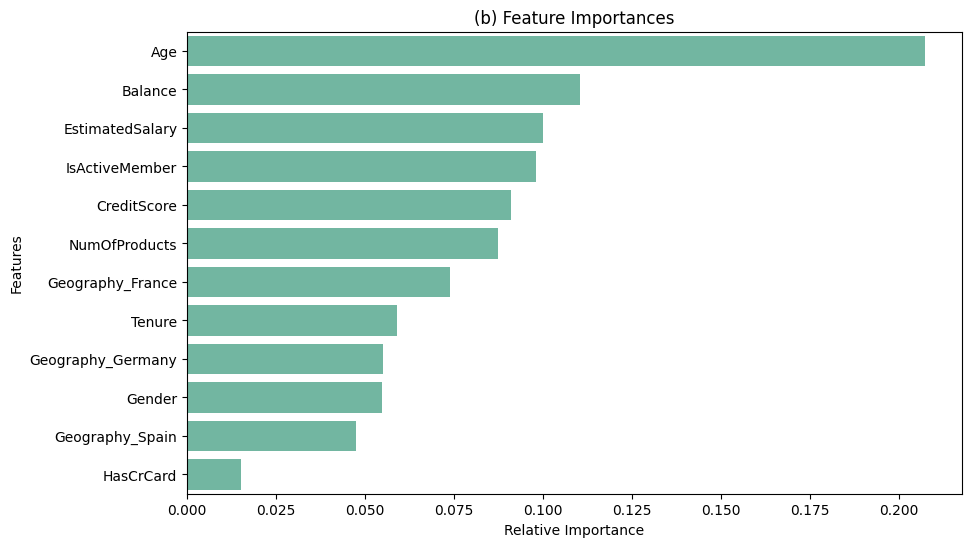

In [38]:
# Biểu đồ (a): SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[:, :, 1], X_val_fold, show=False)
plt.title('(a) SHAP Summary Plot')
plt.show()

# Biểu đồ (b): Feature Importance Plot
feature_importances = best_overall_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('(b) Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()